<a href="https://colab.research.google.com/github/ibonetc/LLM_EPM/blob/main/LLM_Tokenization_Databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Tokenización, Embedding y Similaridad

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

## Texto de ejemplo

In [ ]:
texts = ["Cancer diagnosis using Artificial intelligence", "Artificial intelligence in oncology", "Machine learning applications in medicine"]

##Tokenización

### Tokenización de los textos usando BERT

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
tokens = tokenizer.tokenize(texts[0])
print(tokens)

['cancer', 'diagnosis', 'using', 'artificial', 'intelligence']


In [ ]:
tokens = tokenizer(texts[0])
print(tokens)

{'input_ids': [101, 4456, 11616, 2478, 7976, 4454, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [ ]:
for token_id in tokens['input_ids']:
    token_text = tokenizer.decode([token_id])
    print(f"Token: {token_text}, ID: {token_id}")

Token: [CLS], ID: 101
Token: cancer, ID: 4456
Token: diagnosis, ID: 11616
Token: using, ID: 2478
Token: artificial, ID: 7976
Token: intelligence, ID: 4454
Token: [SEP], ID: 102


BERT tiene tokens especiales, [CLS] y [SEP] tienen significados específicos que ayudan al modelo a comprender mejor la estructura y el contexto del texto:

- [CLS] (ID: 101): Representa el inicio de una secuencia de texto. Este token se coloca siempre al principio de cualquier entrada de texto y actúa como un marcador para representar el "significado" de toda la frase o secuencia. En tareas como clasificación de frases, el embedding correspondiente a [CLS] al final del procesamiento se utiliza como una representación de la secuencia completa.
- [SEP] (ID: 102): Indica el final de una secuencia. Este token se coloca al final de una oración o frase para señalar su final. En tareas de preguntas y respuestas o comparación de frases, se usa también para separar diferentes segmentos (por ejemplo, la pregunta y el contexto).

### Tokenización de los textos usando Dolly (Tokenización basada en subpalabras)

Modelos como Dolly usan Byte-Pair Encoding (BPE) u otros métodos de tokenización en subpalabras que dividen el texto en fragmentos más pequeños. Esto ayuda a capturar estructuras dentro de palabras y facilita el aprendizaje en palabras raras.
Tiene un vocabulario limitado, en lugar de representar cada palabra del idioma, estos modelos dividen las palabras en fragmentos comunes. Por ejemplo, "Cancer" se convierte en "Can" y "cer", y "Artificial" en "Art" y "ificial".


In [ ]:
# Cargar el tokenizador y el modelo de Dolly
tokenizer_dolly = AutoTokenizer.from_pretrained("databricks/dolly-v2-3b")
model_dolly = AutoModel.from_pretrained("databricks/dolly-v2-3b")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
tokens = tokenizer_dolly(texts[0], padding=True, truncation=True)

In [ ]:
tokens

{'input_ids': [5804, 1209, 6120, 970, 3975, 11232, 9260], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [ ]:
for token_id in tokens['input_ids']:
    token_text = tokenizer_dolly.decode([token_id])
    print(f"Token: {token_text}, ID: {token_id}")

Token: Can, ID: 5804
Token: cer, ID: 1209
Token:  diagnosis, ID: 6120
Token:  using, ID: 970
Token:  Art, ID: 3975
Token: ificial, ID: 11232
Token:  intelligence, ID: 9260


In [ ]:

tokens = tokenizer_dolly(texts, padding=True, truncation=True, return_tensors="pt")


In [ ]:
tokens

{'input_ids': tensor([[ 5804,  1209,  6120,   970,  3975, 11232,  9260],
        [11796, 11232,  9260,   275, 18695,  1497,     0],
        [32192,  4715,  4893,   275,  9921,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 0, 0]])}

## Tokenización en Español

In [ ]:
tokenizer_spanish = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

/databricks/python/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

In [ ]:
frase = "La inteligencia artificial está revolucionando la medicina."

In [ ]:
tokens = tokenizer_spanish.tokenize(frase)
print("Tokens:", tokens)

Tokens: ['La', 'inteligencia', 'artificial', 'está', 'revolucion', '##ando', 'la', 'medicina', '.']


In [ ]:
tokens = tokenizer_spanish(frase)
print(tokens)

{'input_ids': [4, 1198, 9145, 16061, 1266, 10736, 1156, 1030, 8799, 1009, 5], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
for token_id in tokens['input_ids']:
    token_text = tokenizer_spanish.decode([token_id])
    print(f"Token: {token_text}, ID: {token_id}")

Token: [CLS], ID: 4
Token: La, ID: 1198
Token: inteligencia, ID: 9145
Token: artificial, ID: 16061
Token: está, ID: 1266
Token: revolucion, ID: 10736
Token: ##ando, ID: 1156
Token: la, ID: 1030
Token: medicina, ID: 8799
Token: ., ID: 1009
Token: [SEP], ID: 5


Los símbolos ## en los tokens indican que el token actual es una continuación de una palabra y no el inicio de una nueva palabra. Este tipo de tokenización es común en los modelos que emplean WordPiece (como BERT y BETO) para crear representaciones de subpalabras. Esto permite que el modelo divida palabras en fragmentos más pequeños cuando no encuentra una coincidencia completa en su vocabulario.

In [ ]:
tokens = tokenizer_spanish(frase.lower())
print(tokens)
for token_id in tokens['input_ids']:
    token_text = tokenizer_spanish.decode([token_id])
    print(f"Token: {token_text}, ID: {token_id}")

{'input_ids': [4, 1030, 9145, 16061, 1266, 10736, 1156, 1030, 8799, 1009, 5], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Token: [CLS], ID: 4
Token: la, ID: 1030
Token: inteligencia, ID: 9145
Token: artificial, ID: 16061
Token: está, ID: 1266
Token: revolucion, ID: 10736
Token: ##ando, ID: 1156
Token: la, ID: 1030
Token: medicina, ID: 8799
Token: ., ID: 1009
Token: [SEP], ID: 5


El modelo es case-sensitive (distingue entre mayúsculas y minúsculas), fíjese que si ponemos toda la frase en minúsculas, ahora el artículo la y La tienen el mismo ID

## Embeddings

In [ ]:
with torch.no_grad():
    embeddings = model_dolly(**tokens).last_hidden_state.mean(dim=1)
print(embeddings.shape)

torch.Size([3, 2560])


### Convertir embedding a numpy

In [ ]:
embeddings_np = embeddings.numpy()

# Imprimir los valores
print(embeddings_np)

[[-2.0223444   0.7598098   0.27845407 ...  0.8714382  -0.45102414
   0.03034343]
 [-0.32785818  0.5927394   0.5237502  ...  1.1761496  -0.00266968
   0.29300246]
 [-0.1243554   0.71428496  0.4004264  ...  1.1053077   0.50290143
   1.0365784 ]]


### Visualizar todos los números

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [ ]:
print(embeddings_np)

[[-2.02234435e+00  7.59809792e-01  2.78454065e-01  1.77691340e+00
  -1.35738921e+00 -8.84500384e-01 -2.29290986e+00 -1.66144192e+00
   1.06015027e+00 -1.08367527e+00 -6.56312823e-01 -5.19231856e-01
   1.19517899e+00  6.23852074e-01  1.89478278e-01 -4.57682937e-01
   4.72000778e-01  1.99422501e-02 -1.30809522e+00 -4.63707030e-01
   1.86099410e+00  3.68473381e-01  8.08374360e-02 -4.88111109e-01
  -1.77924842e-01 -6.51084721e-01  8.56001019e-01  1.45929635e+00
   3.51124376e-01  2.20570117e-01 -3.80603313e-01  1.38981926e+00
   3.32970619e-01  1.51446366e+00  8.04195821e-01 -9.90012646e-01
   9.18319106e-01  2.43475723e+00 -2.13275805e-01  6.15273833e-01
  -2.02153042e-01  2.04406127e-01  2.96238333e-01 -7.40466177e-01
  -6.37449205e-01  4.96386643e-03  1.65538442e+00 -8.77191246e-01
   1.64510012e-01  7.83195198e-01  2.74633551e+00  2.27403417e-01
  -1.39682782e+00  5.67473292e-01  8.93571019e-01  3.98953818e-02
  -3.61378253e-01 -1.21238363e+00 -4.29367125e-01 -9.65596080e-01
  -1.08270

## Embeddings

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-multilingual-cased')
model = BertModel.from_pretrained('google-bert/bert-base-multilingual-cased')

In [ ]:
import numpy as np
np.set_printoptions(threshold=10)

In [ ]:
# Frases de ejemplo
sentences = [
    "Me senté en el banco.",
    "Fui al banco a depositar dinero."
]

# Obtener embeddings contextuales
for sentence in sentences:
    # Tokenizar la frase
    inputs = tokenizer(sentence, return_tensors="pt")

    # Obtener los embeddings de BERT
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

    # Extraer el embedding específico para "banco"
    word_no_context = "banco"
    banco_index = inputs['input_ids'][0].tolist().index(tokenizer.encode(word_no_context)[1])  # Buscar índice de "banco"

    # Obtener embedding correspondiente y convertir a numpy para visualización
    banco_embedding = embeddings[0][banco_index].detach().numpy()

    print(f"Embedding contextual para la frase: '{sentence}'")
    print(f"Embedding de 'banco' (vector): {banco_embedding}\n")


Embedding contextual para la frase: 'Me senté en el banco.'
Embedding de 'banco' (vector): [-0.19163647 -0.4503448   0.34074116 ...  0.41328615  0.04915576
  0.4850212 ]

Embedding contextual para la frase: 'Fui al banco a depositar dinero.'
Embedding de 'banco' (vector): [ 0.09040447 -1.0858136   0.9709251  ... -0.2384639  -0.48175544
  0.5727483 ]



## Funciones de distancia entre secuencias

In [ ]:
oraciones = [
    "Me gusta el clima cálido.",                # Oración 1
    "Prefiero el clima templado.",               # Oración 2
    "Amo las playas de verano.",                 # Oración 3 (cercana)
    "El frío invierno es difícil de soportar.", # Oración 4 (distante)
    "Me encanta la música rock.",                 # Oración 5 (distante)
    "Disfruto de la música clásica."              # Oración 6 (distante)
]

In [ ]:
embeddings = []
for oracion in oraciones:
    inputs = tokenizer(oracion, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # Tomar el embedding de la [CLS] token como representación de la oración
    embedding = outputs.last_hidden_state[0][0].numpy()
    embeddings.append(embedding)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similitudes = []
for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        sim = cosine_similarity([embeddings[i]], [embeddings[j]])
        similitudes.append((oraciones[i], oraciones[j], sim[0][0]))

In [ ]:
print(similitudes)

[('Me gusta el clima cálido.', 'Prefiero el clima templado.', 0.74945223), ('Me gusta el clima cálido.', 'Amo las playas de verano.', 0.9167605), ('Me gusta el clima cálido.', 'El frío invierno es difícil de soportar.', 0.9512081), ('Me gusta el clima cálido.', 'Me encanta la música rock.', 0.87791073), ('Me gusta el clima cálido.', 'Disfruto de la música clásica.', 0.84370434), ('Prefiero el clima templado.', 'Amo las playas de verano.', 0.6265668), ('Prefiero el clima templado.', 'El frío invierno es difícil de soportar.', 0.7326039), ('Prefiero el clima templado.', 'Me encanta la música rock.', 0.6111083), ('Prefiero el clima templado.', 'Disfruto de la música clásica.', 0.58056545), ('Amo las playas de verano.', 'El frío invierno es difícil de soportar.', 0.894644), ('Amo las playas de verano.', 'Me encanta la música rock.', 0.89546746), ('Amo las playas de verano.', 'Disfruto de la música clásica.', 0.8810564), ('El frío invierno es difícil de soportar.', 'Me encanta la música roc

In [ ]:
for oracion1, oracion2, sim in similitudes:
    print(f"Similitud entre '{oracion1}' y '{oracion2}': {sim:.4f}")

Similitud entre 'Me gusta el clima cálido.' y 'Prefiero el clima templado.': 0.7495
Similitud entre 'Me gusta el clima cálido.' y 'Amo las playas de verano.': 0.9168
Similitud entre 'Me gusta el clima cálido.' y 'El frío invierno es difícil de soportar.': 0.9512
Similitud entre 'Me gusta el clima cálido.' y 'Me encanta la música rock.': 0.8779
Similitud entre 'Me gusta el clima cálido.' y 'Disfruto de la música clásica.': 0.8437
Similitud entre 'Prefiero el clima templado.' y 'Amo las playas de verano.': 0.6266
Similitud entre 'Prefiero el clima templado.' y 'El frío invierno es difícil de soportar.': 0.7326
Similitud entre 'Prefiero el clima templado.' y 'Me encanta la música rock.': 0.6111
Similitud entre 'Prefiero el clima templado.' y 'Disfruto de la música clásica.': 0.5806
Similitud entre 'Amo las playas de verano.' y 'El frío invierno es difícil de soportar.': 0.8946
Similitud entre 'Amo las playas de verano.' y 'Me encanta la música rock.': 0.8955
Similitud entre 'Amo las playa

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

similitudes = cosine_similarity(embeddings)


df_similitud = pd.DataFrame(similitudes, index=oraciones, columns=oraciones)

In [ ]:
df_similitud

,Me gusta el clima cálido.,Prefiero el clima templado.,Amo las playas de verano.,El frío invierno es difícil de soportar.,Me encanta la música rock.,Disfruto de la música clásica.
Me gusta el clima cálido.,1.000000,0.749452,0.916761,0.951208,0.877911,0.843704
Prefiero el clima templado.,0.749452,1.000000,0.626567,0.732604,0.611108,0.580565
Amo las playas de verano.,0.916761,0.626567,1.000000,0.894644,0.895468,0.881056
El frío invierno es difícil de soportar.,0.951208,0.732604,0.894644,1.000000,0.853614,0.831098
Me encanta la música rock.,0.877911,0.611108,0.895468,0.853614,1.000000,0.905493
Disfruto de la música clásica.,0.843704,0.580565,0.881056,0.831098,0.905493,1.000000


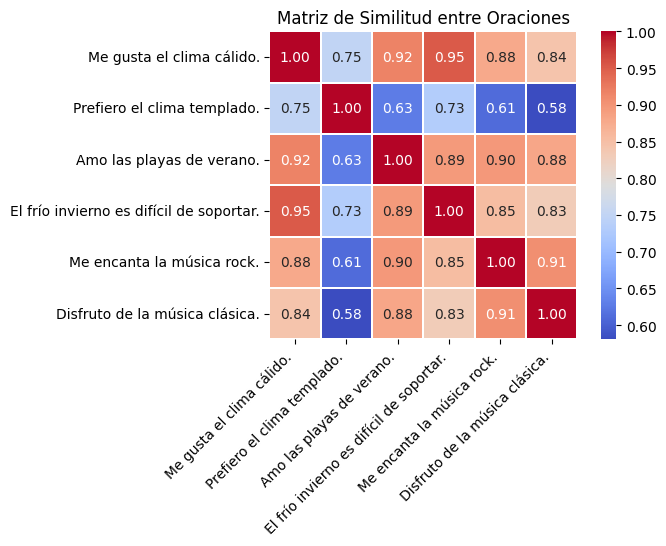

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_similitud, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f", linewidths=.2)

# Ajustar los letreros
plt.title('Matriz de Similitud entre Oraciones')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.show()